In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
df0 = pd.read_csv('course_grades.csv',sep=';')
df = df0.iloc[:,-5:]
df1=pd.DataFrame()

In [212]:
def clean (s): # define new function which returns string until character ","

    converted_ =float(s.replace(",", ".")) #split (",", -1) [0] + "." + s.split (",", -1) [1]
    return converted_


for col in df.columns:
    df1 [col] = df [col]. apply (clean)



df1.to_csv('converted_data.csv', index=False) 
df = pd.read_csv('converted_data.csv',sep=',')
df

,STACKexer,exercises,exam1,exam2,grade
0,0.00,0.0,0.0,3.0,0.0
1,6.55,7.0,21.0,0.0,1.0
2,8.51,8.0,15.0,16.0,3.0
3,6.00,3.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...
616,9.99,8.0,25.0,21.0,5.0
617,10.57,7.0,20.0,12.0,3.0
618,0.00,0.0,0.0,0.0,0.0
619,8.15,8.0,20.0,22.0,5.0


# Dates and Times

In [213]:
from datetime import datetime 

In [214]:
datetime.now()

datetime.datetime(2022, 6, 23, 11, 57, 42, 154451)

In [215]:
datetime.now().month

6

In [216]:
datetime.now().year

2022

In [217]:
dt1 = datetime(2022,1,1)

In [218]:
delta = datetime.now() - dt1
delta

datetime.timedelta(days=173, seconds=43062, microseconds=706450)

In [219]:
delta.days/30

5.766666666666667

In [220]:
# DateTime to string

dt1.strftime('%d.%m.%Y')

'01.01.2022'

In [221]:
dt1.strftime('%d/%m/%Y')

'01/01/2022'

In [222]:
dt2 = '01.1.2022'
dt2=datetime.strptime(dt2,'%d.%m.%Y')
dt2

datetime.datetime(2022, 1, 1, 0, 0)

In [223]:
print(datetime.now().strftime('%A %d.%B.%Y %H:%M:%S'))

Thursday 23.June.2022 11:57:43


In [224]:

dates = [datetime(2011, 1, 2),
         datetime(2011, 1, 5),
         datetime(2011, 1, 7),
         datetime(2011, 1, 8),
         datetime(2011, 1, 10),
         datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts.index
ts

2011-01-02   -0.980462
2011-01-05    2.140005
2011-01-07   -1.302247
2011-01-08   -1.741387
2011-01-10   -1.305950
2011-01-12    1.546204
dtype: float64

In [225]:
ts[0]

-0.9804624448136998

In [226]:
ts[datetime(2011,1,7):] #slice from jan 7th onwards

2011-01-07   -1.302247
2011-01-08   -1.741387
2011-01-10   -1.305950
2011-01-12    1.546204
dtype: float64

In [227]:
ts[datetime(2011,1,5): datetime(2011,1,10)]

2011-01-05    2.140005
2011-01-07   -1.302247
2011-01-08   -1.741387
2011-01-10   -1.305950
dtype: float64

# Rolling Average

In [246]:

df = pd.read_csv ('humidity.small.csv')

df = df.fillna (df.mean ())

def Convert (s):

    return datetime.strptime (s, '%Y-%m-%d %H:%M:%S')

df ['datetime2'] = df ['datetime']. apply (Convert)
df

C:\Users\hocineg\AppData\Local\Temp\ipykernel_9264\3524287924.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna (df.mean ())


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime2
0,2012-10-01 12:00:00,78.272727,78.727273,83.0,78.0,88.0,79.909091,20.727273,24.181818,48.909091,...,56.272727,75.727273,68.0,54.818182,62.909091,25.0,51.0,51.0,50.0,2012-10-01 12:00:00
1,2012-10-01 13:00:00,76.000000,81.000000,88.0,81.0,88.0,82.000000,22.000000,23.000000,50.000000,...,58.000000,93.000000,68.0,50.000000,63.000000,22.0,51.0,51.0,50.0,2012-10-01 13:00:00
2,2012-10-01 14:00:00,76.000000,80.000000,87.0,80.0,88.0,81.000000,21.000000,23.000000,49.000000,...,57.000000,91.000000,68.0,51.000000,62.000000,22.0,51.0,51.0,50.0,2012-10-01 14:00:00
3,2012-10-01 15:00:00,76.000000,80.000000,86.0,80.0,88.0,81.000000,21.000000,23.000000,49.000000,...,57.000000,87.000000,68.0,51.000000,62.000000,22.0,51.0,51.0,50.0,2012-10-01 15:00:00
4,2012-10-01 16:00:00,77.000000,80.000000,85.0,79.0,88.0,81.000000,21.000000,23.000000,49.000000,...,57.000000,84.000000,68.0,52.000000,62.000000,22.0,51.0,51.0,50.0,2012-10-01 16:00:00
5,2012-10-01 17:00:00,78.000000,79.000000,84.0,79.0,88.0,80.000000,21.000000,24.000000,49.000000,...,57.000000,80.000000,68.0,54.000000,62.000000,23.0,51.0,51.0,50.0,2012-10-01 17:00:00
6,2012-10-01 18:00:00,78.000000,79.000000,83.0,78.0,88.0,80.000000,21.000000,24.000000,49.000000,...,56.000000,76.000000,68.0,55.000000,63.000000,23.0,51.0,51.0,50.0,2012-10-01 18:00:00
7,2012-10-01 19:00:00,79.000000,78.000000,82.0,77.0,88.0,80.000000,21.000000,24.000000,49.000000,...,56.000000,72.000000,68.0,56.000000,63.000000,23.0,51.0,51.0,50.0,2012-10-01 19:00:00
8,2012-10-01 20:00:00,79.000000,78.000000,81.0,77.0,88.0,79.000000,20.000000,25.000000,49.000000,...,56.000000,68.000000,68.0,57.000000,63.000000,24.0,51.0,51.0,50.0,2012-10-01 20:00:00
9,2012-10-01 21:00:00,80.000000,77.000000,80.0,76.0,88.0,79.000000,20.000000,25.000000,49.000000,...,55.000000,64.000000,68.0,58.000000,64.000000,24.0,51.0,51.0,50.0,2012-10-01 21:00:00


In [244]:
df2 = df.loc [:, ['datetime2', 'Vancouver']]
#Compute Rolling average into new column

df2 ['AVG'] = df2 ['Vancouver']. rolling (3, center = True) .mean (skipna = False)
df2

,datetime2,Vancouver,AVG
0,2012-10-01 12:00:00,78.272727,NaN
1,2012-10-01 13:00:00,76.000000,76.757576
2,2012-10-01 14:00:00,76.000000,76.000000
3,2012-10-01 15:00:00,76.000000,76.333333
4,2012-10-01 16:00:00,77.000000,77.000000
5,2012-10-01 17:00:00,78.000000,77.666667
6,2012-10-01 18:00:00,78.000000,78.333333
7,2012-10-01 19:00:00,79.000000,78.666667
8,2012-10-01 20:00:00,79.000000,79.333333
9,2012-10-01 21:00:00,80.000000,80.000000


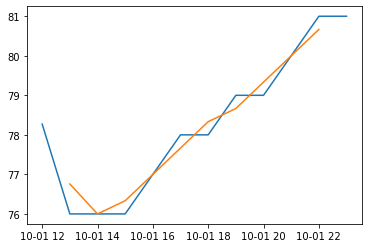

In [247]:
#plot data and Rolling average

plt.plot (df2 ['datetime2'], df2 ['Vancouver'])

plt.plot (df2 ['datetime2'], df2 ['AVG'])

plt.show ()